# Bird Species Identifier - Binary Decision Tree Model

### Species
__MASKED BOBBY__: species 1  
__CRESTED COUA__: species 2

## Etape 1: chargée les données

Pour commencer on va charger les images de deux especes de oiseau, qu'on va utiliser pour entrainer notre model.

Species 1 images:
['040.jpg', '085.jpg', '070.jpg', '071.jpg', '131.jpg', '061.jpg', '114.jpg', '001.jpg', '103.jpg', '033.jpg', '014.jpg', '038.jpg', '050.jpg', '008.jpg', '087.jpg', '118.jpg', '129.jpg', '023.jpg', '053.jpg', '128.jpg', '086.jpg', '116.jpg', '002.jpg', '077.jpg', '039.jpg', '016.jpg', '024.jpg', '009.jpg', '082.jpg', '127.jpg', '015.jpg', '080.jpg', '106.jpg', '094.jpg', '091.jpg', '096.jpg', '124.jpg', '112.jpg', '064.jpg', '030.jpg', '081.jpg', '126.jpg', '105.jpg', '026.jpg', '021.jpg', '017.jpg', '076.jpg', '003.jpg', '108.jpg', '098.jpg', '099.jpg', '111.jpg', '113.jpg', '020.jpg', '012.jpg', '067.jpg', '044.jpg', '101.jpg', '130.jpg', '083.jpg', '055.jpg', '022.jpg', '109.jpg', '123.jpg', '119.jpg', '120.jpg', '019.jpg', '035.jpg', '097.jpg', '122.jpg', '029.jpg', '058.jpg', '089.jpg', '059.jpg', '065.jpg', '090.jpg', '066.jpg', '031.jpg', '084.jpg', '018.jpg', '048.jpg', '006.jpg', '104.jpg', '057.jpg', '074.jpg', '042.jpg', '011.jpg', '093.jpg', '049.jpg', '0

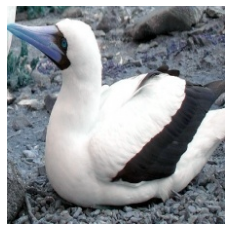

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

CLASS_NAMES = ['MASKED BOBBY', 'CRESTED COUA']

# Define the directory where your images are stored
species1_img_dir = r'/home/louba/Documents/BDBird/train/MASKED BOOBY'
species2_img_dir = r'/home/louba/Documents/BDBird/train/CRESTED COUA'

# Get the list of image file names
s1_image_names = os.listdir(species1_img_dir)
s2_image_names = os.listdir(species2_img_dir)

# Load the images of each species
s1_images = []
for image in s1_image_names:
    img = cv2.imread(os.path.join(species1_img_dir, image))
    s1_images.append(img)

s2_images = []
for image in s2_image_names:
    img = cv2.imread(os.path.join(species2_img_dir, image))
    s2_images.append(img)

# Print the loaded image names
print("Species 1 images:")
print(s1_image_names)

print("Species 2 images:")
print(s2_image_names)

plt.imshow(s1_images[0])
plt.axis('off')
plt.show()



### Chargement des jeux de test pour chaque espèce

In [4]:
# Define the directory where your images are stored
species1_img_dir_TEST = r'/home/louba/Documents/BDBird/train/MASKED BOOBY'
species2_img_dir_TEST = r'/home/louba/Documents/BDBird/train/CRESTED COUA'

# Get the list of image file names
s1_image_names_TEST = os.listdir(species1_img_dir_TEST)
s2_image_names_TEST = os.listdir(species2_img_dir_TEST)

# Load the images of each species
s1_images_TEST = []
for image in s1_image_names_TEST:
    img = cv2.imread(os.path.join(species1_img_dir_TEST, image))
    s1_images_TEST.append(img)

s2_images_TEST = []
for image in s2_image_names_TEST:
    img = cv2.imread(os.path.join(species2_img_dir_TEST, image))
    s2_images_TEST.append(img)

# Print the loaded image names
print("Species 1 images:")
print(s1_image_names_TEST)

print("Species 2 images:")
print(s2_image_names_TEST)

Species 1 images:
['040.jpg', '085.jpg', '070.jpg', '071.jpg', '131.jpg', '061.jpg', '114.jpg', '001.jpg', '103.jpg', '033.jpg', '014.jpg', '038.jpg', '050.jpg', '008.jpg', '087.jpg', '118.jpg', '129.jpg', '023.jpg', '053.jpg', '128.jpg', '086.jpg', '116.jpg', '002.jpg', '077.jpg', '039.jpg', '016.jpg', '024.jpg', '009.jpg', '082.jpg', '127.jpg', '015.jpg', '080.jpg', '106.jpg', '094.jpg', '091.jpg', '096.jpg', '124.jpg', '112.jpg', '064.jpg', '030.jpg', '081.jpg', '126.jpg', '105.jpg', '026.jpg', '021.jpg', '017.jpg', '076.jpg', '003.jpg', '108.jpg', '098.jpg', '099.jpg', '111.jpg', '113.jpg', '020.jpg', '012.jpg', '067.jpg', '044.jpg', '101.jpg', '130.jpg', '083.jpg', '055.jpg', '022.jpg', '109.jpg', '123.jpg', '119.jpg', '120.jpg', '019.jpg', '035.jpg', '097.jpg', '122.jpg', '029.jpg', '058.jpg', '089.jpg', '059.jpg', '065.jpg', '090.jpg', '066.jpg', '031.jpg', '084.jpg', '018.jpg', '048.jpg', '006.jpg', '104.jpg', '057.jpg', '074.jpg', '042.jpg', '011.jpg', '093.jpg', '049.jpg', '0

Dans cette étape, nous avons traité les images. C'est une étape importante car elle peut affecter considérablement les performances de notre modèle.

Nous avons effectué deux opérations principales :

1. **Redimensionnement** : Nous avons redimensionné toutes les images pour qu'elles aient la même taille (224x224 pixels). C'est nécessaire car l'entrée d'un modèle d'apprentissage automatique doit toujours être de la même taille.

2. **Normalisation** : Nous avons normalisé les valeurs des pixels pour qu'elles soient comprises entre 0 et 1. Cela est généralement fait en divisant chaque valeur de pixel par 255 (puisque les valeurs RGB varient de 0 à 255). La normalisation aide à accélérer l'apprentissage du modèle et conduit souvent à de meilleures performances.

Notez que pour un modèle plus complexe, il pourrait être nécessaire d'ajouter des étapes supplémentaires, comme la suppression de l'arrière-plan.

In [5]:
import numpy as np

# Process species 1 images
processed_images_species1 = []
for img in s1_images:
    # Resize image to 224x224 pixels
    resized = cv2.resize(img, (224, 224))
    # Normalize pixel values
    normalized = resized / 255.0
    processed_images_species1.append(normalized)

# Convert the list to a numpy array
processed_images = np.array(processed_images_species1)

# Process species 2 images
processed_images_species2 = []
for img in s2_images:
    resized = cv2.resize(img, (224, 224))
    normalized = resized / 255.0
    processed_images_species2.append(normalized)

processed_images = np.concatenate((processed_images_species1, processed_images_species2))

## Concatenate the test set
# Process species 1 images
processed_images_species1_TEST = []
for img in s1_images_TEST:
    # Resize image to 224x224 pixels
    resized = cv2.resize(img, (224, 224))
    # Normalize pixel values
    normalized = resized / 255.0
    processed_images_species1_TEST.append(normalized)

# Convert the list to a numpy array
processed_images_TEST = np.array(processed_images_species1)

# Process species 2 images
processed_images_species2_TEST = []
for img in s2_images_TEST:
    resized = cv2.resize(img, (224, 224))
    normalized = resized / 255.0
    processed_images_species2_TEST.append(normalized)

processed_images_TEST = np.concatenate((processed_images_species1_TEST, processed_images_species2_TEST))

# print len and shape of the processed images
print("Processed images shape:", processed_images.shape)
print("- len :", len(processed_images))
print("Processed images shape TEST:", processed_images_TEST.shape)
print("- len :", len(processed_images_TEST))

Processed images shape: (284, 224, 224, 3)
- len : 284
Processed images shape TEST: (284, 224, 224, 3)
- len : 284


Rappel

**Features** are the inputs to the model. In your case, the features are the processed images of birds. 

**Labels** are what we want the model to predict. In your case, the labels are the species of the birds.

Ici, `X_train` et `X_test` sont les features (images), et `y_train` and `y_test` sont les labels (espèces).

### Labelisation

In [6]:
# Get the length of the lists
num_s1_images = len(s1_images)
num_s2_images = len(s2_images)

# Create labels
s1_labels = [1] * num_s1_images # for species 1
s2_labels = [2] * num_s2_images # for species 2

# combiner les labels dans l'ordre des images
labels = s1_labels + s2_labels
print(len(labels))

# Do the same for the test set
num_s1_images_TEST = len(s1_images_TEST)
num_s2_images_TEST = len(s2_images_TEST)

s1_labels_TEST = [1] * num_s1_images_TEST 
s2_labels_TEST = [2] * num_s2_images_TEST 

labels_TEST = s1_labels_TEST + s2_labels_TEST
print(len(labels_TEST))

284
284


### Construction du model

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split

# x represents our images, the inputs of the model (bird images)
# y represents our labels, the outputs of the model (bird species)

# We can use our dataset's test set to train the model and the test set to evaluate it
X_train = processed_images
y_train = labels
X_test = processed_images_TEST
y_test = labels_TEST

# Initialize the model
clf = tree.DecisionTreeClassifier()

# Flatten the images from 4D to 2D
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train the model
clf = clf.fit(X_train, y_train)

# Predict on the test set
predictions = clf.predict(X_test)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Resultat des predictions

In [8]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy
# Print the test labels
print("Expected Result:", y_test)
print("Predicted Result:", predictions)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Expected Result: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Predicted Result: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

We can also try to split the train set in 80/20 to get a larger training set and compare the results.

In [9]:
# here we split our data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(processed_images, labels, test_size=0.2, random_state=42)

# And then we do the same as before, train the model and predict on the test set

# Initialize the model
clf = tree.DecisionTreeClassifier()

# Flatten the images from 4D to 2D
X_train2 = X_train2.reshape(X_train2.shape[0], -1)
X_test2 = X_test2.reshape(X_test2.shape[0], -1)

# Train the model
clf = clf.fit(X_train2, y_train2)

# Predict on the test set
predictions2 = clf.predict(X_test2)

In [10]:
# Calculate and print the accuracy
# Print the test labels
print("Expected Result:", y_test2)
print("Predicted Result:", predictions2)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test2, predictions2)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Expected Result: [1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2]
Predicted Result: [2 1 2 2 1 2 1 1 1 2 1 2 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1
 1 2 1 1 2 1 2 1 2 1 2 1 1 2 2 2 1 1 2 2]
Accuracy: 66.67%


## Visualize the decision tree 

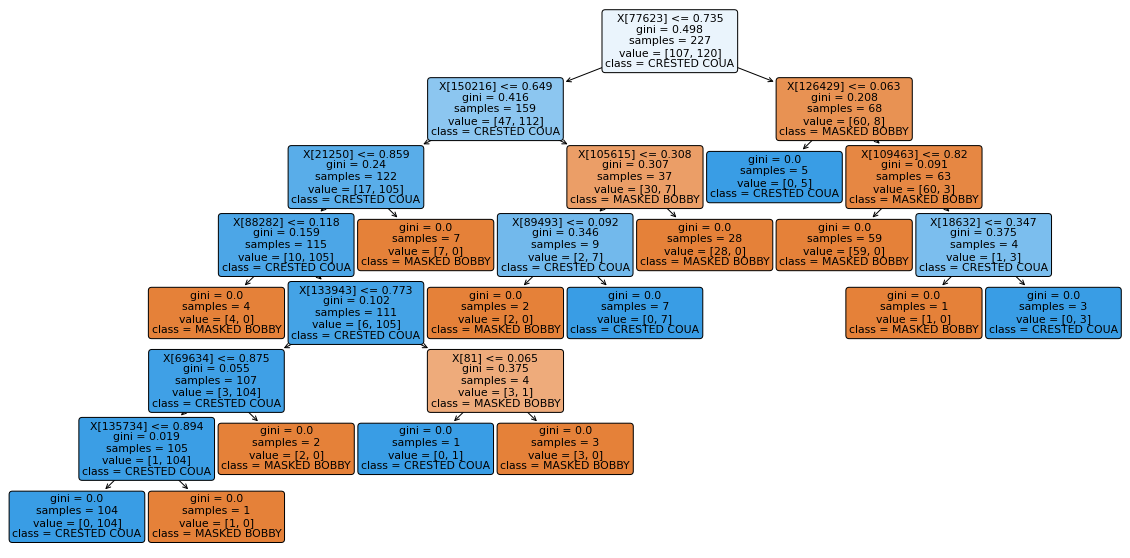

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf, filled=True, rounded=True, class_names=CLASS_NAMES)
plt.show()

### Matrice de confusion set de test originale

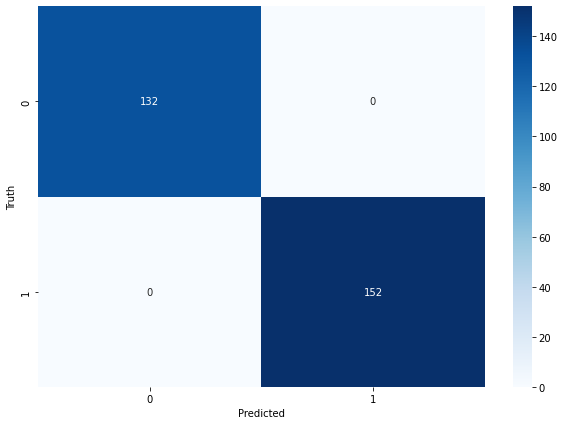

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Matrice de confusion set 80/20

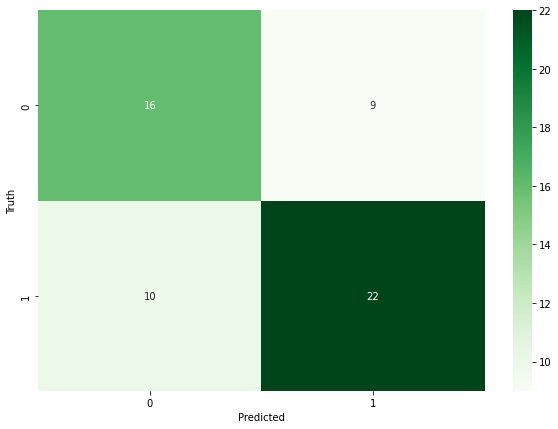

In [13]:
# Calculate the confusion matrix
cm2 = confusion_matrix(y_test2, predictions2)

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Bird Species Identifier - CNN Model

## Dataframe Creation

In [35]:
import pandas as pd

In [38]:
dataset = "/home/louba/Documents/BDBird/train/"
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

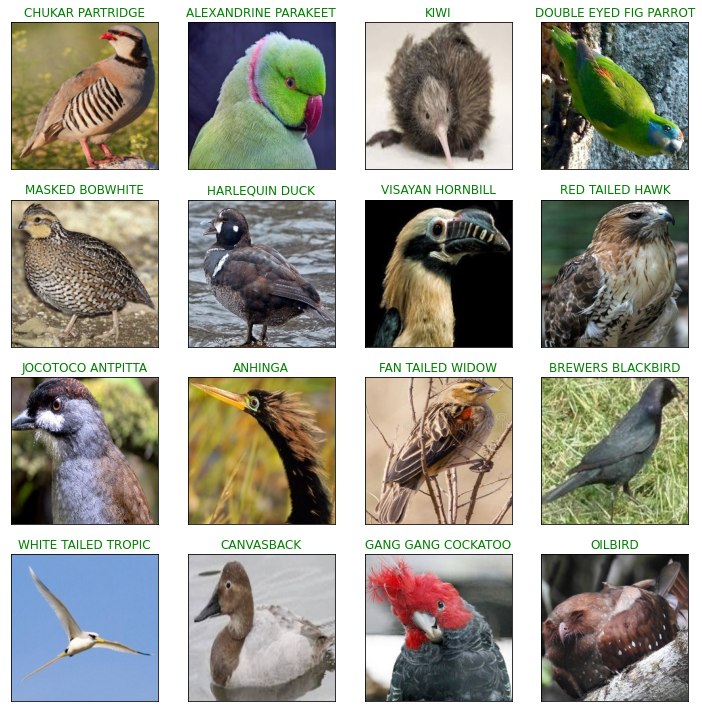

In [46]:
# Display 16 random pictures of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]], color='green')
plt.tight_layout()
plt.show()

## Data Visualization

In [14]:
from pathlib import Path
import random

def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

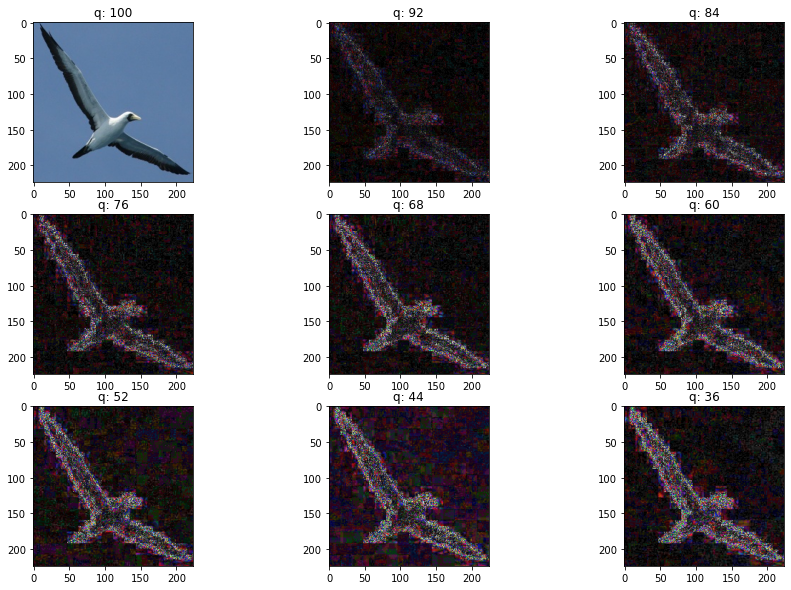

In [15]:
# View random sample from the dataset
p = random_sample('/home/louba/Documents/BDBird/train/MASKED BOOBY')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

## Data Processing

In [25]:
import tensorflow as tf

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

In [47]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [48]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
)

In [49]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 54167 validated image filenames belonging to 525 classes.
Found 13541 validated image filenames belonging to 525 classes.
Found 16927 validated image filenames belonging to 525 classes.


In [50]:
# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

## Model training

In [51]:
# Charger le modèle pré-entraîné EfficientNetB0
# - input_shape : spécifie la forme des images en entrée du modèle (224x224 pixels avec 3 canaux de couleur)
# - include_top : spécifie si les couches supérieures (couches entièrement connectées) doivent être incluses ou non
# - weights : spécifie les poids à utiliser pour initialiser le modèle (dans ce cas, les poids pré-entraînés sur ImageNet)
# - pooling : spécifie le type de pooling à appliquer à la sortie de la dernière couche du réseau (dans ce cas, un pooling global maximum)
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Rendre le modèle pré-entraîné non-entraînable (gelé)
# Cela signifie que les poids du modèle ne seront pas mis à jour lors de l'apprentissage
pretrained_model.trainable = False

16705208/16705208 [==============================] - 3s 0us/step


In [53]:
# Création d'un rappel de point de contrôle (checkpoint)
# - checkpoint_path : chemin où les poids du modèle seront sauvegardés
# - save_weights_only : spécifie si seuls les poids du modèle doivent être sauvegardés (True) ou si le modèle entier doit être sauvegardé (False)
# - monitor : spécifie la métrique à surveiller pour décider si les poids du modèle doivent être sauvegardés (dans ce cas, la précision de validation)
# - save_best_only : spécifie si seuls les poids du modèle associés à la meilleure valeur de la métrique surveillée doivent être sauvegardés
checkpoint_path = "birds_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Configuration d'un rappel d'arrêt anticipé (EarlyStopping) pour arrêter l'entraînement si la val_loss du modèle ne s'améliore pas pendant 3 époques
# - monitor : spécifie la métrique à surveiller pour arrêter l'entraînement (dans ce cas, la perte de validation)
# - patience : spécifie le nombre d'époques à attendre avant d'arrêter l'entraînement si la métrique surveillée ne s'améliore pas
# - restore_best_weights : spécifie si les meilleurs poids du modèle doivent être restaurés à la fin de l'entraînement
early_stopping = EarlyStopping(monitor = "val_loss", # surveiller la perte de validation
                               patience = 5, # arrêter l'entraînement si la perte de validation ne s'améliore pas pendant 5 époques
                               restore_best_weights = True) # restaurer les meilleurs poids du modèle si nécessaire

# Configuration d'un rappel de réduction du taux d'apprentissage (ReduceLROnPlateau) pour réduire le taux d'apprentissage si la val_loss ne s'améliore pas
# - monitor : spécifie la métrique à surveiller pour ajuster le taux d'apprentissage (dans ce cas, la perte de validation)
# - factor : spécifie le facteur par lequel le taux d'apprentissage sera réduit (dans ce cas, 0.2)
# - patience : spécifie le nombre d'époques à attendre avant de réduire le taux d'apprentissage si la métrique surveillée ne s'améliore pas
# - min_lr : spécifie la valeur minimale du taux d'apprentissage (1e-6 dans ce cas)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [70]:
import datetime

# Définition d'une fonction pour créer un rappel TensorBoard
def create_tensorboard_callback(dir_name, experiment_name):
    # Création du répertoire de logs TensorBoard en fonction du nom du répertoire et du nom de l'expérience, ainsi que de la date et de l'heure actuelles
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    
    # Création d'un objet TensorBoard callback avec le répertoire de logs spécifié
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir
    )
    
    # Affichage du chemin du répertoire de logs TensorBoard
    print(f"Saving TensorBoard log files to: {log_dir}")
    
    # Retourne le callback TensorBoard nouvellement créé
    return tensorboard_callback

In [82]:
# Définition des entrées du modèle en utilisant les entrées du modèle pré-entraîné
inputs = pretrained_model.input

# Augmentation des données en utilisant une fonction d'augmentation (non spécifiée dans le code donné)
x = augment(inputs)

# Ajout d'une couche dense avec 128 neurones et une fonction d'activation ReLU
x = Dense(128, activation='relu')(pretrained_model.output)

# Ajout d'une couche de dropout pour régulariser le modèle en réduisant le surapprentissage
x = Dropout(0.45)(x)

# Ajout d'une autre couche dense avec 256 neurones et une fonction d'activation ReLU
x = Dense(256, activation='relu')(x)

# Ajout d'une autre couche de dropout pour régulariser le modèle
x = Dropout(0.45)(x)

# Ajout de la couche de sortie avec 525 neurones et une fonction d'activation softmax pour la classification multi-classe
outputs = Dense(525, activation='softmax')(x)

# Création du modèle en spécifiant les entrées et les sorties
model = Model(inputs=inputs, outputs=outputs)

# Compilation du modèle avec l'optimiseur Adam, une faible valeur de taux d'apprentissage, la perte categorical_crossentropy pour la classification multi-classe
# et la métrique accuracy pour évaluer les performances du modèle
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entraînement du modèle avec les données d'entraînement et de validation, en spécifiant le nombre d'époques et les rappels (callbacks) à utiliser
# history = model.fit(
#     train_images,
#     steps_per_epoch=len(train_images),
#     validation_data=val_images,
#     validation_steps=len(val_images),
#     epochs=150,
#     callbacks=[
#         early_stopping,  # Arrêt anticipé pour éviter le surapprentissage
#         create_tensorboard_callback("training_logs", "bird_classification"),  # Rappel TensorBoard pour visualiser les métriques d'entraînement
#         checkpoint_callback,  # Rappel pour sauvegarder les meilleurs poids du modèle
#         reduce_lr  # Rappel pour réduire le taux d'apprentissage si la perte de validation ne s'améliore pas
#     ]
# )

## Model Evaluation

In [66]:
# Take more than 6min
results = model.evaluate(test_images, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


Test Loss: 5.39870
Test Accuracy: 7.80%


In [62]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

529/529 [==============================] - 397s 748ms/step
The first 5 predictions: ['RED HEADED DUCK', 'CRESTED OROPENDOLA', 'RED HEADED DUCK', 'COMMON FIRECREST', 'TOWNSENDS WARBLER']


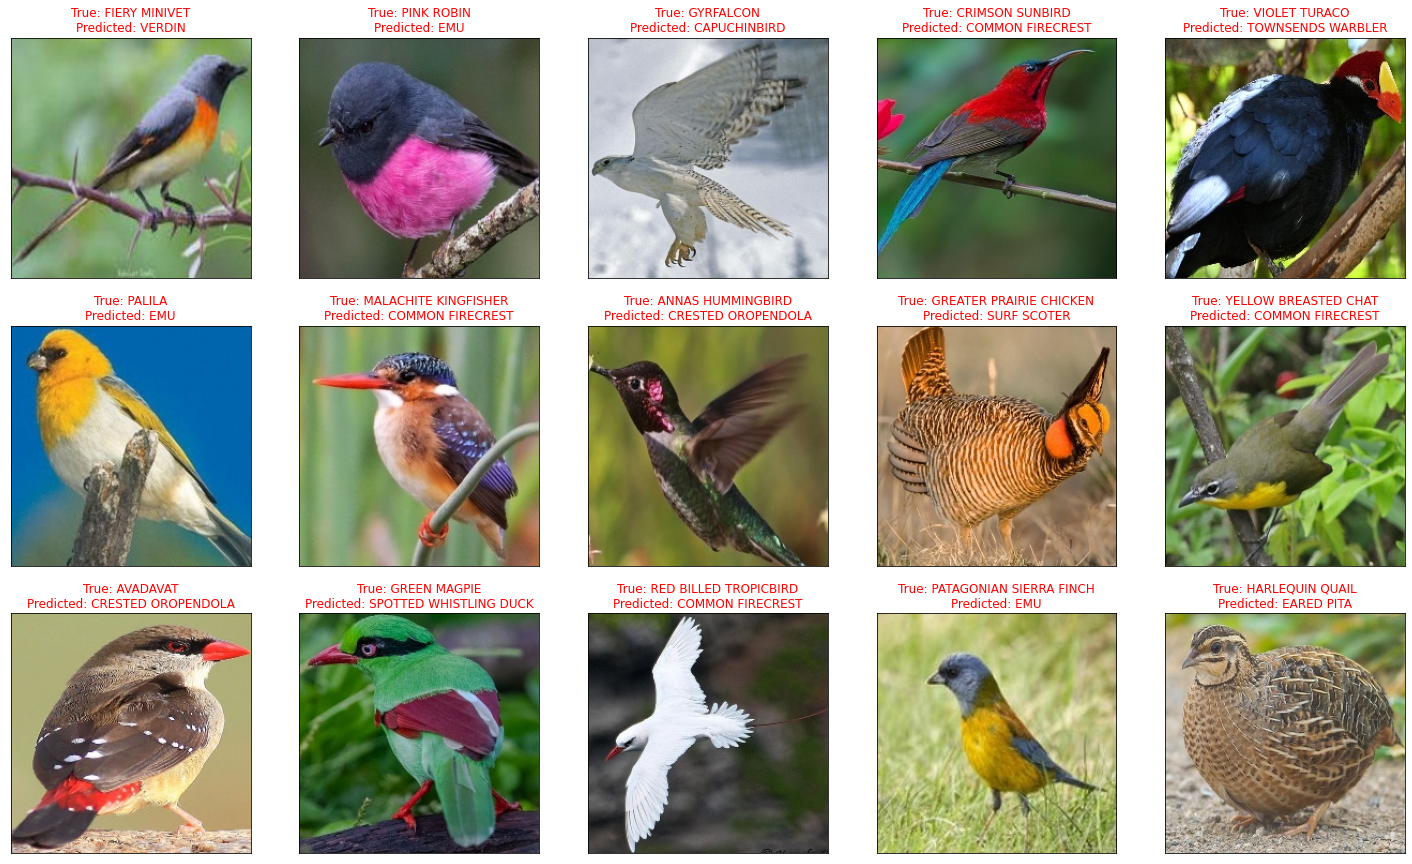

<Figure size 432x288 with 0 Axes>

In [77]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()